In [2]:
import os
from gquant.dataframe_flow import TaskGraph

In [3]:
from dask_cuda import LocalCUDACluster
from dask.distributed import Client

cluster = LocalCUDACluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:40359 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 1 Memory: 25.18 GB


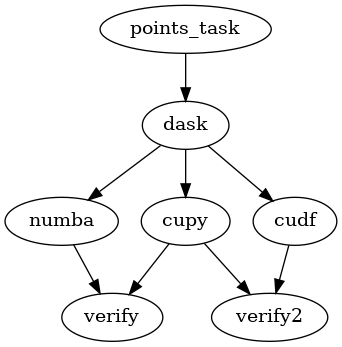

In [4]:
task_graph = TaskGraph.load_taskgraph('../../workflow/test_run_dask.gq.yaml')
task_graph.draw(show='ipynb')


In [5]:
e=task_graph.draw()

In [6]:
e

GQuantWidget(sub=HBox(), value=[OrderedDict([('id', 'points_task'), ('type', 'PointNode'), ('conf', {'npts': 8…

In [7]:
e

GQuantWidget(cache={'nodes': [{'width': 110, 'id': 'points_task', 'type': 'PointNode', 'schema': {'title': 'Po…

In [7]:
task_graph.run()

Results()

In [8]:

out_list = [
    'verify.max_diff', 'verify2.max_diff'
]

diff = task_graph.run(out_list)

In [9]:
diff

Results([('verify.max_diff', 0.0), ('verify2.max_diff', 2.220446049250313e-16)])

In [8]:
task_graph.save_taskgraph('workflow/test_run.gq.yaml')
